# 双流不稳定性

In [32]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FFMpegFileWriter
from IPython.display import HTML
matplotlib.use("Agg")
%config InlineBackend.figure_format = 'svg'
#%matplotlib notebook

c:\users\rguo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  # Remove the CWD from sys.path while we load stuff.


## 参数设置 函数定义

In [33]:
a = 10  # 半宽度
k = 1
num = 1000  # 粒子数
m=1
tem = 0.1 # 温度
vmax = 10
max_steps = 1000  # 最大时间步数

path = './data/'

## 能量-时间曲线

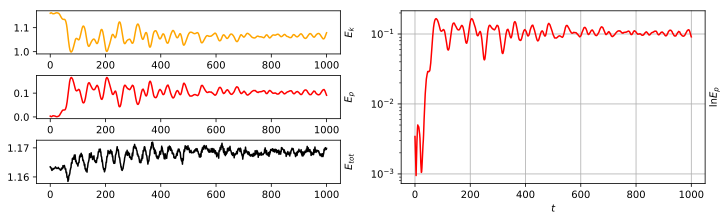

In [42]:
dataet = np.loadtxt(os.path.join(path,"tot_energy"))#("./data/totEnergy")
dataep = np.loadtxt(os.path.join(path,"pot_energy"))#("./data/potEnergy")
dataek = np.loadtxt(os.path.join(path,"kin_energy"))#("./data/kinEnergy")

t = np.linspace(0, max_steps, max_steps)
fig = plt.figure(figsize=(12, 3))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax1.plot(t, dataek, color='orange')
ax1.set_ylabel(r'$E_k$')
ax1.yaxis.set_label_position("right")

ax2 = plt.subplot2grid((3, 2), (1, 0))
ax2.plot(t, dataep, color='r')
ax2.set_ylabel(r'$E_p$')
ax2.yaxis.set_label_position("right")

ax3 = plt.subplot2grid((3, 2), (2, 0))
ax3.plot(t, dataet, color='black')
ax3.set_ylabel(r'$E_{tot}$')
ax3.yaxis.set_label_position("right")

axl2 = plt.subplot2grid((3, 2), (0, 1), rowspan=3)
axl2.plot(t, dataep, color='r')
axl2.set_ylabel(r'$\ln E_p$')
axl2.set_yscale('log')
axl2.yaxis.set_label_position("right")
axl2.grid()

fig.subplots_adjust(bottom=0.1, top=0.9, hspace=.5, wspace=.2)
plt.xlabel(r'$t$')
plt.show()

## 速度-密度分布曲线

In [43]:
progesses = np.arange(0,max_steps,1)

e1xdata = []
e1vdata = []
e2xdata = []
e2vdata = []

for progess in progesses:
    e1xdata_temp = np.loadtxt(os.path.join(path,"e1x_data"+str(progess)))
    e1vdata_temp = np.loadtxt(os.path.join(path,"e1v_data"+str(progess)))
    e2xdata_temp = np.loadtxt(os.path.join(path,"e2x_data"+str(progess)))
    e2vdata_temp = np.loadtxt(os.path.join(path,"e2v_data"+str(progess)))
    e1xdata.append(e1xdata_temp)
    e1vdata.append(e1vdata_temp)
    e2xdata.append(e2xdata_temp)
    e2vdata.append(e2vdata_temp)

### 动画显示

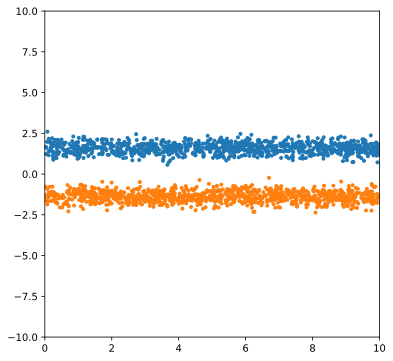

In [44]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot()
x1_ani,v1_ani=[],[]
x2_ani,v2_ani=[],[]
xv1,=ax.plot(x1_ani,v1_ani,'.')
xv2,=ax.plot(x2_ani,v2_ani,'.')
ax.set_xlim(0,a)
ax.set_ylim(-vmax,vmax)
def update(frame):
    x1_ani = e1xdata[frame]
    v1_ani = e1vdata[frame]
    x2_ani = e2xdata[frame]
    v2_ani = e2vdata[frame]
    xv1.set_data(x1_ani,v1_ani)
    xv2.set_data(x2_ani,v2_ani)
    return xv1,xv2
ani = FuncAnimation(fig,update,frames=np.arange(0,max_steps), interval = 50, repeat=False, blit = False)

In [45]:
my_writer = FFMpegFileWriter(fps=18,bitrate=-1,codec="libx264")
ani.save('./two-stream-instability-pic.mp4', dpi=120, writer=my_writer)